# [이지AI] 전력설비 고장 대응을 위한 전력품질 분류 모델
- 수치예측
- 상세 설명 :  
전력 설비의 에너지 사용 패턴에 대해 측정된 20여개의 feature 데이터를 바탕으로 "역률", "전류고조파", "전압고조파" 3가지 도메인에 대한 전력 설비의 상태(State Of Health: 정상, 주의, 경고)를 예측하는 Multi-class 분류 과제

- 추진 배경 :  
디지털 ICT 혁신의 핵심인 AI 분야 중 스마트그리드·스마트팩토리 4차 산업혁명의 핵심인 개별 설비·장비별 에너지 효율화·에너지 사용 패턴 분석·설비별 이상 감지 등 AI 핵심 알고리즘 개발 필요

- 활용 가능 서비스 :  
에너지 사용 패턴과 설비 이상 (SOH) 진단 AI Solution

- 채점방식  
Macro F1-Score  

Macro F1 = 1/6 * sum( F1 )  

F1-score: Pricision과 Recall의 조화평균  
F1 = (2 * Recall * Precision ) / ( Precision + Recall )  

- Recall[재현율/민감도] : ( TP ) / ( TP + FN )
- Precision[정밀도] : ( TP ) / ( TP + FP )
- TP : True로 예측하고 실제 값도 True
- TN : False로 예측하고 실제 값도 False
- FP : True로 예측하고 실제는 False
- FN : False로 예측하고 실제는 True

# 1. Null data check

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [29]:
# for 한글
mlt.rc('font', family='Malgun Gothic')

In [30]:
# load data
train = pd.read_csv(r'./data/train.csv',encoding='utf-8', index_col = 'index')
train

,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,R상전류,R상전압,R상선간전압,S상유효전력,S상무효전력,S상전류,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균
index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2248930.5,28963.0,20237.0,59.854076,45.197918,259.916656,449.916656,47.5,8663.0,6182.0,40.84375,258.25,448.25,9883.0,6751.0,46.03125,260.75,452.75,10417.0,7304.0,48.71875,260.75,448.75,정상,경고,주의
1,0.0,0.0,0.0,0.0,101.3125,0.0,0.0,24.375,0.0,0.0,101.75,0.0,0.0,0.0,0.0,101.5,0.0,0.0,0.0,0.0,100.6875,0.0,0.0,경고,정상,정상
2,5375707.0,35244.0,19826.0,59.97565,107.385414,125.416664,216.75,18.75,11988.0,7384.0,111.53125,126.0,217.75,11020.0,6272.0,101.0625,125.25,216.25,12236.0,6170.0,109.5625,125.0,216.25,정상,정상,주의
3,17781200.0,77056.0,39520.0,59.863,244.854,118.083,205.333,23.125,25796.0,12244.0,243.188,117.5,117.5,26268.0,13572.0,249.188,118.75,118.75,24992.0,13704.0,242.188,118.0,118.0,정상,정상,경고
4,10143988.0,0.0,0.0,59.79814,0.0,133.75,231.5,26.875,0.0,0.0,0.0,133.75,232.75,0.0,0.0,0.0,134.5,231.5,0.0,0.0,0.0,133.0,230.25,경고,정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420561,6229905.0,25925.5,22606.0,57.945,52.833,215.327,372.958,19.063,8631.5,6670.5,50.5,214.227,214.227,9475.5,8068.5,56.875,216.628,216.628,7818.5,7867.0,51.125,215.128,215.128,주의,정상,경고
2420562,6057307.5,91244.0,47068.0,59.92882,152.15625,224.416672,388.583344,33.75,30128.0,17328.0,153.53125,225.75,390.75,32064.0,15244.0,157.75,224.25,386.25,29052.0,14496.0,145.1875,223.25,388.75,정상,정상,주의
2420563,7966820.0,16822.0,11924.8,59.914,31.3631,219.233,379.862,17.3214,5157.84,3806.66,29.3793,218.862,218.862,5709.16,3945.14,31.9149,219.276,219.276,5954.98,4172.97,32.7953,219.56,219.56,정상,경고,경고


In [31]:
# null check
train.isna().sum()

누적전력량              17
유효전력평균             17
무효전력평균             17
주파수                17
전류평균               17
상전압평균              17
선간전압평균             17
온도                 17
R상유효전력             18
R상무효전력             18
R상전류               18
R상전압               18
R상선간전압             18
S상유효전력           1380
S상무효전력           1380
S상전류             1380
S상전압             1380
S상선간전압           1380
T상유효전력           2898
T상무효전력           2898
T상전류             2898
T상전압             2898
T상선간전압           2898
label_역률평균          0
label_전류고조파평균       0
label_전압고조파평균       0
dtype: int64

In [32]:
# null row delete
train2 = train.dropna()
train2.isna().sum()

누적전력량            0
유효전력평균           0
무효전력평균           0
주파수              0
전류평균             0
상전압평균            0
선간전압평균           0
온도               0
R상유효전력           0
R상무효전력           0
R상전류             0
R상전압             0
R상선간전압           0
S상유효전력           0
S상무효전력           0
S상전류             0
S상전압             0
S상선간전압           0
T상유효전력           0
T상무효전력           0
T상전류             0
T상전압             0
T상선간전압           0
label_역률평균       0
label_전류고조파평균    0
label_전압고조파평균    0
dtype: int64

# 2. EDA
- before : 2898 null data delete

In [33]:
train2.info()
feature_col = train2.columns[0:23]
target_col = train2.columns[23:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417652 entries, 0 to 2420565
Data columns (total 26 columns):
 #   Column         Dtype  
---  ------         -----  
 0   누적전력량          float64
 1   유효전력평균         float64
 2   무효전력평균         float64
 3   주파수            float64
 4   전류평균           float64
 5   상전압평균          float64
 6   선간전압평균         float64
 7   온도             float64
 8   R상유효전력         float64
 9   R상무효전력         float64
 10  R상전류           float64
 11  R상전압           float64
 12  R상선간전압         float64
 13  S상유효전력         float64
 14  S상무효전력         float64
 15  S상전류           float64
 16  S상전압           float64
 17  S상선간전압         float64
 18  T상유효전력         float64
 19  T상무효전력         float64
 20  T상전류           float64
 21  T상전압           float64
 22  T상선간전압         float64
 23  label_역률평균     object 
 24  label_전류고조파평균  object 
 25  label_전압고조파평균  object 
dtypes: float64(23), object(3)
memory usage: 498.0+ MB


In [34]:
# print all columns
pd.set_option('max_columns', None)
# display option
pd.options.display.float_format = '{:3}'.format
# Need to background knowledge for understand
train2.describe()

,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,R상전류,R상전압,R상선간전압,S상유효전력,S상무효전력,S상전류,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압
count,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0,2417652.0
mean,8250512.0387809845,36913.41290416436,20119.490002383274,57.64316177451553,84.74899090960655,196.66120137172962,340.56793164094,28.96789627559054,11522.861055237681,7520.981878278857,84.69574647035842,196.52315213022908,307.51440417979137,13666.547958486228,7088.966817568646,86.65302966467671,197.1775024007107,307.37375857212993,11723.838414438944,5509.403756883242,82.89941481398102,196.28299218676966,306.49229029911453
std,11347375.79038914,40197.13602621613,20869.204271870454,11.21845860814053,85.22464297034881,57.72109666400685,99.88848293684563,11.311603110214428,15347.733420372255,8133.154880725215,85.71723045752684,57.60645828603821,111.2351912659528,14559.248831589763,7941.429276705663,87.17584876169367,57.83271367649721,111.0367856795272,13441.442873243737,11034.921200287963,83.18330107643357,57.74114897954193,110.82538683547705
min,-1281148.13,-18412.0,-30332.0,0.0,0.0,0.0,0.0,-5.625,-54944.0,-7732.0,0.0,0.0,0.0,-34536.0,-31472.0,0.0,0.0,0.0,-72632.0,-63232.0,0.0,0.0,0.0
25%,663270.3,0.0,0.0,59.835423,0.0,134.75,233.416672,21.0714,0.0,0.0,0.0,134.75,219.0,0.0,0.0,0.0,135.5,219.236,0.0,0.0,0.0,134.25,218.0
50%,4076548.625,28102.5,15388.0,59.891422,62.479168,219.583328,380.25,28.2143,9574.0,6092.5,60.4375,219.5,375.25,10403.0,5809.73,64.6875,220.25,376.25,9219.0,5611.0,63.538,219.0,372.75
75%,11235316.5,71056.0,39612.0,59.929,137.25,227.25,393.333344,36.875,23502.0,12780.0,136.8125,227.75,392.75,24668.0,14364.0,140.625,227.25,391.0,22486.0,13404.0,137.312,226.75,391.5
max,91706790.0,241576.0,478960.0,60.37,4095.94,625.5833,472.583,63.75,80880.0,167888.0,4095.94,488.5,469.5,82912.0,155344.0,4095.94,490.5,473.0,106312.0,478960.0,4095.94,897.75,472.25


<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\user\Appdata\Roaming\python\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


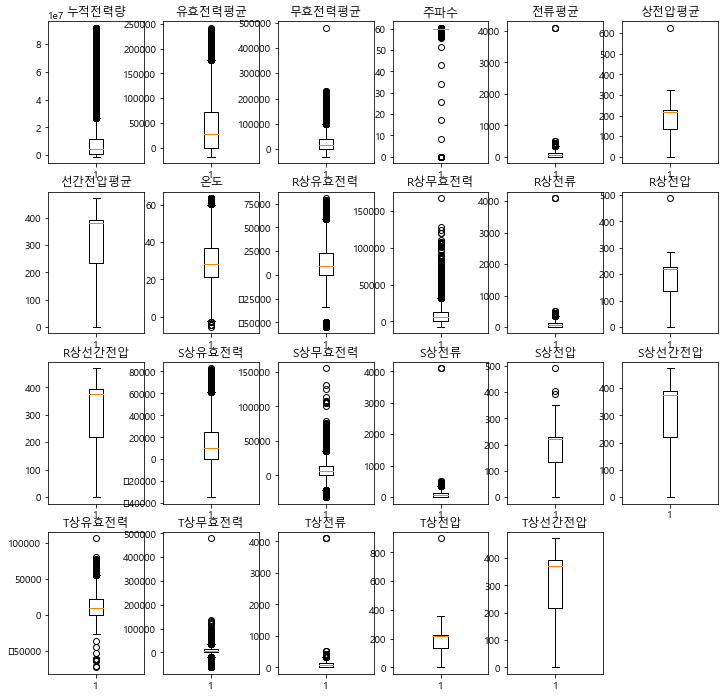

In [35]:
# box plot about feature col
plt.figure(figsize=(12,12))
for i in range(len(feature_col)) :
    plt.subplot(4,6,i+1)
    plt.title(feature_col[i])
    plt.boxplot(train2[feature_col[i]])
plt.show

- 음수 값이 있는 변수 : 누적전력량, 유효전력평균, 무효전력평균, 온도, R상유효전력, R상무효전력, S상유효전력, S상무효전력, T상유효전력, T상무효전력

In [36]:
train2[train2['누적전력량']<0]

,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,R상전류,R상전압,R상선간전압,S상유효전력,S상무효전력,S상전류,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균
index,,,,,,,,,,,,,,,,,,,,,,,,,,
33,-47556.3,100.0,4534.0,59.844784,139.041672,225.583328,390.416656,42.5,-19142.0,23850.0,134.375,226.75,392.75,28650.0,11964.0,137.0625,225.75,388.5,-9408.0,-31280.0,145.6875,224.25,390.0,경고,주의,경고
74,-43932.8828,0.0,0.0,59.84475,0.0,134.75,233.25,14.375,0.0,0.0,0.0,134.75,232.5,0.0,0.0,0.0,134.25,233.25,0.0,0.0,0.0,135.25,234.0,경고,정상,주의
78,-26794.498,216.0,4264.0,59.826195,182.020828,224.416672,388.333344,41.25,-24216.0,31236.0,173.75,225.75,391.25,38088.0,13348.0,181.5625,224.75,386.0,-13656.0,-40320.0,190.75,222.75,387.75,경고,주의,경고
96,-517772.781,-2648.0,6560.0,59.882084,285.166656,219.0,379.0,45.0,-51768.0,39248.0,298.25,218.0,378.25,56136.0,26856.0,283.5625,219.5,380.75,-7016.0,-59544.0,273.6875,219.5,378.0,경고,정상,정상
103,-847896.8,-3532.0,5028.0,59.956898,282.25,217.0,375.916656,63.125,-50432.0,39064.0,294.875,216.0,375.0,55340.0,24820.0,278.75,217.5,377.5,-8440.0,-58856.0,273.125,217.5,375.25,주의,정상,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420487,-48547.64,772.0,5900.0,59.80746,205.4375,226.916672,392.666656,43.75,-27240.0,36172.0,198.75,228.0,395.5,43804.0,15204.0,203.5,227.5,390.5,-15792.0,-45476.0,214.0625,225.25,392.0,경고,주의,경고
2420527,-34464.7,0.0,0.0,59.81677,0.0,133.0,230.25,18.75,0.0,0.0,0.0,133.0,231.5,0.0,0.0,0.0,133.75,230.25,0.0,0.0,0.0,132.25,229.0,경고,정상,정상
2420535,-185447.2,-2816.0,6304.0,59.910122,295.770844,217.75,376.916656,51.875,-53016.0,41040.0,309.0,216.75,376.0,58368.0,26824.0,294.0,218.25,378.75,-8168.0,-61560.0,284.3125,218.25,376.0,경고,정상,정상


In [37]:
# target columns change to numeric
for i in target_col :
    train2[i] = train2[i].map({'정상':0,'경고':1,'주의':2})
train2.head(5)

C:\Users\user\AppData\Local\Temp/ipykernel_17536/373647180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2[i] = train2[i].map({'정상':0,'경고':1,'주의':2})


,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,R상전류,R상전압,R상선간전압,S상유효전력,S상무효전력,S상전류,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균
index,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2248930.5,28963.0,20237.0,59.854076,45.197918,259.916656,449.916656,47.5,8663.0,6182.0,40.84375,258.25,448.25,9883.0,6751.0,46.03125,260.75,452.75,10417.0,7304.0,48.71875,260.75,448.75,0,1,2
1,0.0,0.0,0.0,0.0,101.3125,0.0,0.0,24.375,0.0,0.0,101.75,0.0,0.0,0.0,0.0,101.5,0.0,0.0,0.0,0.0,100.6875,0.0,0.0,1,0,0
2,5375707.0,35244.0,19826.0,59.97565,107.385414,125.416664,216.75,18.75,11988.0,7384.0,111.53125,126.0,217.75,11020.0,6272.0,101.0625,125.25,216.25,12236.0,6170.0,109.5625,125.0,216.25,0,0,2
3,17781200.0,77056.0,39520.0,59.863,244.854,118.083,205.333,23.125,25796.0,12244.0,243.188,117.5,117.5,26268.0,13572.0,249.188,118.75,118.75,24992.0,13704.0,242.188,118.0,118.0,0,0,1
4,10143988.0,0.0,0.0,59.79814,0.0,133.75,231.5,26.875,0.0,0.0,0.0,133.75,232.75,0.0,0.0,0.0,134.5,231.5,0.0,0.0,0.0,133.0,230.25,1,0,0


C:\Users\user\Appdata\Roaming\python\python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\user\Appdata\Roaming\python\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


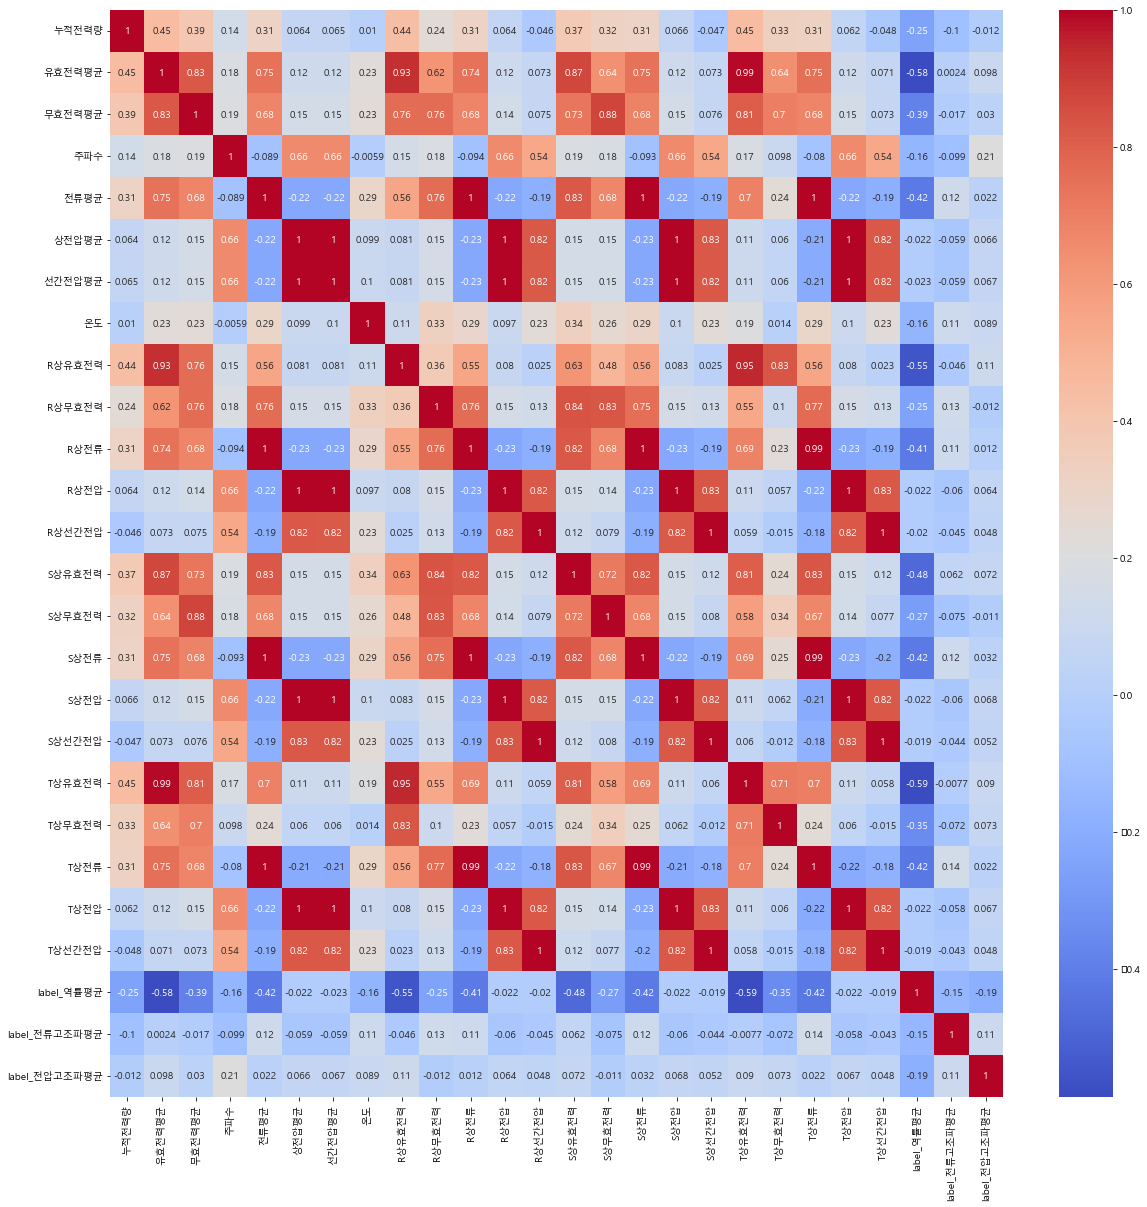

In [67]:
# correlation train2
plt.figure(figsize=(20,20))
sns.heatmap(train2.corr(), annot=True,cmap='coolwarm')

1. target 변수와 0.3 이상인 변수
    - 역률평균 : 유효전력평균, 무효전력평균, 전류평균, R상유효전력, R상무효전력, R상 전류, S상유효전력, S상무효전력, S상전류, T상유효전력, T상무효전력, T상전류
    - 전류고조파평균 : X
    - 전압고조파평균 :X
2. 0.9 이상인 변수
    - R상유효전력-유효전력평균, R상전류-전류평균, R상전압-상전압평균,석간전압평균, S상전류-전류평균,R상전류, S상전압-상전압평균,선간전압평균,R상전압, S상선간전압-R상선간전압, T상유효전력-유효전력평균,R상유효전력, T상전류-전류평균,R상전류,S상전류, T상전압-상전압평균,선간전압평균,R상전압,S상전압, T상선간전압-R상선간전압,S상선간전압

In [43]:
# seperate data (train, validation)
train_raw_X = train2[feature_col]
train_raw_y = train2[target_col]
train_X, test_X, train_y, test_y = train_test_split(train_raw_X, train_raw_y, test_size = 0.3, shuffle=None, random_state=100)

In [65]:
# scaling train_X
Scaler = MinMaxScaler()
Scaler.fit_transform(train_X)
train_scale_X = pd.DataFrame(Scaler.fit_transform(train_X))
train_scale_X.columns = feature_col
train_scale_X

,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,R상전류,R상전압,R상선간전압,S상유효전력,S상무효전력,S상전류,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압
0,0.015540952504825692,0.07081865316860778,0.05955718919598188,0.9897404448569629,0.0,0.3469258210697121,0.7954348759900377,0.27064954128440366,0.4039617969579059,0.044026876209998865,0.0,0.44148208802456496,0.4593482428115016,0.295300636158424,0.1684652278177458,0.0,0.4454373088685016,0.4621618191433104,0.48128710771840544,0.11662289373506064,0.0,0.2416496797549429,0.45937744838538913
1,0.01396584606687848,0.07081865316860778,0.05955718919598188,0.9799946961912023,0.0,0.3439589899538559,0.7886297221863673,0.29357798165137616,0.4039617969579059,0.044026876209998865,0.0,0.43834186284544524,0.45608093716719916,0.295300636158424,0.1684652278177458,0.0,0.4389459734964322,0.4554267583289265,0.48128710771840544,0.11662289373506064,0.0,0.24070286828181564,0.4575775542615141
2,0.4974273982216322,0.4053263996799852,0.1431477423560551,0.9926575396956938,0.03691167351084244,0.34234769374438223,0.7878679512381953,0.4036697247706422,0.6245136186770428,0.11559047944425466,0.03720904114806369,0.43705220061412486,0.45473908413205544,0.5545522949586155,0.25498886605001714,0.03899446769239783,0.44036697247706424,0.45690111052353255,0.658343935538592,0.14214890666037122,0.034531267547864467,0.23725981620718462,0.45103229221810487
3,0.22381556735782202,0.13612628275151162,0.08323123080668851,0.993531010707064,0.007731851540794054,0.3502155508307207,0.8030525854717584,0.3971170642201835,0.4426819508312699,0.0661938845234028,0.00730118116964604,0.4477461617195496,0.46586581469648564,0.34362251179971276,0.1894986510791367,0.0076673974716426506,0.44618348623853216,0.46293601269169754,0.5215335427268872,0.12443317127512026,0.008226975981093473,0.24471177944862155,0.46519851773425097
4,0.8166489079888581,0.6742618890102621,0.16369391233319983,0.9932843835979712,0.05915410674961059,0.3629945492470787,0.8319526009187804,0.6972477064220184,0.7983138780804151,0.14668033253615761,0.06022732266585936,0.46673490276356194,0.8434504792332269,0.7439975374512621,0.2611553614251456,0.05883875252078887,0.4643221202854231,0.8281332628239026,0.8185697625106022,0.14925340100923656,0.0583962411558763,0.25118351434140906,0.830068819481207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692351,0.07071557088196725,0.1736657076480453,0.09495534977969416,0.9905012430801869,0.010233711431319794,0.4156121175229582,0.9520373267764605,0.5412844036697249,0.4657027473175333,0.07614166951372281,0.009590289408536257,0.5301944728761515,0.9542066027689031,0.3727084615910801,0.2008232699554642,0.010421905594320229,0.5300713557594292,0.955579058699101,0.5429654368108566,0.12832170153746275,0.010688938314526091,0.2907268170426065,0.9528851244044468
1692352,0.013777573261264438,0.07081865316860778,0.05955718919598188,0.0,0.02186870754942699,0.0,0.0,0.41284403669724773,0.4039617969579059,0.044026876209998865,0.022117938739337,0.0,0.0,0.295300636158424,0.1684652278177458,0.0219195715757555,0.0,0.0,0.48128710771840544,0.11662289373506064,0.021568614286342082,0.0,0.0
1692353,0.017678196775390745,0.07081865316860778,0.05955718919598188,0.9912727483674213,0.0,0.3617956681388394,0.8291312721786438,0.3577981651376147,0.4039617969579059,0.044026876209998865,0.0,0.4662231320368475,0.8349307774227903,0.295300636158424,0.1684652278177458,0.0,0.45871559633027525,0.8239026969857218,0.48128710771840544,0.11662289373506064,0.0,0.25201893622946253,0.8343038644785601
1692354,0.31334178083683895,0.45889810298936873,0.16135340826087982,0.992974475420161,0.03557384336684619,0.41428001035193873,0.9495686472005976,0.46788990825688076,0.6491274613842707,0.1349732376722469,0.034851584740010835,0.5281473899692938,0.952076677316294,0.5764758191394761,0.2643028434395341,0.03520254202942426,0.5285423037716616,0.9534637757800106,0.7115139949109415,0.1497624457756662,0.0366674072374107,0.28989139515455303,0.949708840656432


In [68]:
# scaling test_X
test_scale_X = pd.DataFrame(Scaler.transform(test_X))
test_scale_X.columns = feature_col
test_scale_X

,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,R상무효전력,R상전류,R상전압,R상선간전압,S상유효전력,S상무효전력,S상전류,S상전압,S상선간전압,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압
0,0.07419954962711464,0.10463079065187623,0.10636187098953057,0.9787681904067357,0.009267225594124913,0.35059599576906864,0.8038524449673391,0.3899155963302752,0.4294986587666549,0.08154395854686255,0.008239866794923754,0.44789355168884337,0.4660191693290735,0.33055014022846985,0.21263168036998972,0.01007094830490681,0.45102344546381246,0.4679576943416182,0.48925864079728587,0.13321756868415616,0.009491105826745509,0.24278473962684488,0.46153520381154056
1,0.3946899443956947,0.34430819883994646,0.14589272951469884,0.9918908078363774,0.032038841389278164,0.34221394337093075,0.7841656259323759,0.5779816513761469,0.5853672915929725,0.12078350985081426,0.03228807062603456,0.4375639713408393,0.7923322683706071,0.503266297284356,0.25417523124357655,0.03326464743135885,0.43883792048929665,0.7847699629825489,0.6281674088210347,0.14332561159146576,0.030563802204133846,0.2375382901698691,0.7808364213869773
2,0.027281662127548026,0.09857762665969198,0.06562394461330633,0.9937499585639937,0.0027720540339946386,0.36832292677889583,0.8439434850597674,0.6605504587155964,0.4215673269661597,0.049911741259537644,0.0027542517712661804,0.4718526100307063,0.850905218317359,0.3155717730350914,0.17374047190818775,0.002708474733516604,0.4704383282364934,0.8434690639873083,0.4975697757633588,0.11859774766134507,0.0028534353530569293,0.25619604566972987,0.8433033350979354
3,0.02942049866914282,0.09533036140129544,0.06726789346779452,0.9911184406802134,0.0027847697964325647,0.33621953782973424,0.7675900318039371,0.25688073394495414,0.4139252446645443,0.04965692973465437,0.0018234520036914603,0.432446264073695,0.7768903088391907,0.32756173472877764,0.17906924460431656,0.004798959457413926,0.4281345565749236,0.7662612374405077,0.4895551712256149,0.11838841222297636,0.0017318979281923073,0.23363965469228626,0.7649550026469032
4,0.32813638783282056,0.372817206948013,0.15161439802706506,0.9926645340935458,0.05680930384722432,0.20860531283363862,0.4783991976012679,0.5871559633027523,0.5992807451951421,0.14073567930759595,0.05891504758370483,0.2686796315250768,0.48296059637912675,0.5269512278541624,0.24997858855772526,0.0580147658412965,0.26554536187563715,0.47540983606557374,0.6465224766751485,0.14358013397468056,0.05403216355708335,0.14480646059593427,0.47961884595023824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725291,0.04701468510774044,0.43657399572287947,0.13904793320923953,0.9931295123810786,0.03909104576727198,0.34501133262348915,0.7905137171671431,0.7706422018348624,0.6328557953071572,0.09643548570777816,0.03711754810861487,0.436028659160696,0.7933972310969117,0.5996648197551133,0.2542822884549503,0.04374758907601185,0.4444444444444445,0.8006345848757271,0.6697148006785412,0.1447457727152005,0.036408004023496435,0.24115845168476746,0.7829539438856539
725292,0.02117760614550794,0.07081865316860778,0.05955718919598188,0.9951486723903602,0.0,0.3576661972913919,0.8201381429293902,0.8440366972477065,0.4039617969579059,0.044026876209998865,0.0,0.46059365404298874,0.8285410010649628,0.295300636158424,0.1684652278177458,0.0,0.4556574923547401,0.8159703860391327,0.48128710771840544,0.11662289373506064,0.0,0.24812030075187969,0.8215987294865008
725293,0.1174784961327758,0.07081865316860778,0.05955718919598188,0.9920455464580501,0.0,0.2161982265191542,0.4956801239147409,0.3853211009174312,0.4039617969579059,0.044026876209998865,0.0,0.27686796315250767,0.501597444089457,0.295300636158424,0.1684652278177458,0.0,0.2772680937818553,0.49550502379693284,0.48128710771840544,0.11662289373506064,0.0,0.14981899192425507,0.4933827421916358
725294,0.013777573261264438,0.07081865316860778,0.05955718919598188,0.9925097623230682,0.0,0.21526577196034485,0.49338776892101494,0.43119266055045874,0.4039617969579059,0.044026876209998865,0.0,0.27635619242579323,0.49840255591054317,0.29530063615

C:\Users\user\Appdata\Roaming\python\python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\user\Appdata\Roaming\python\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


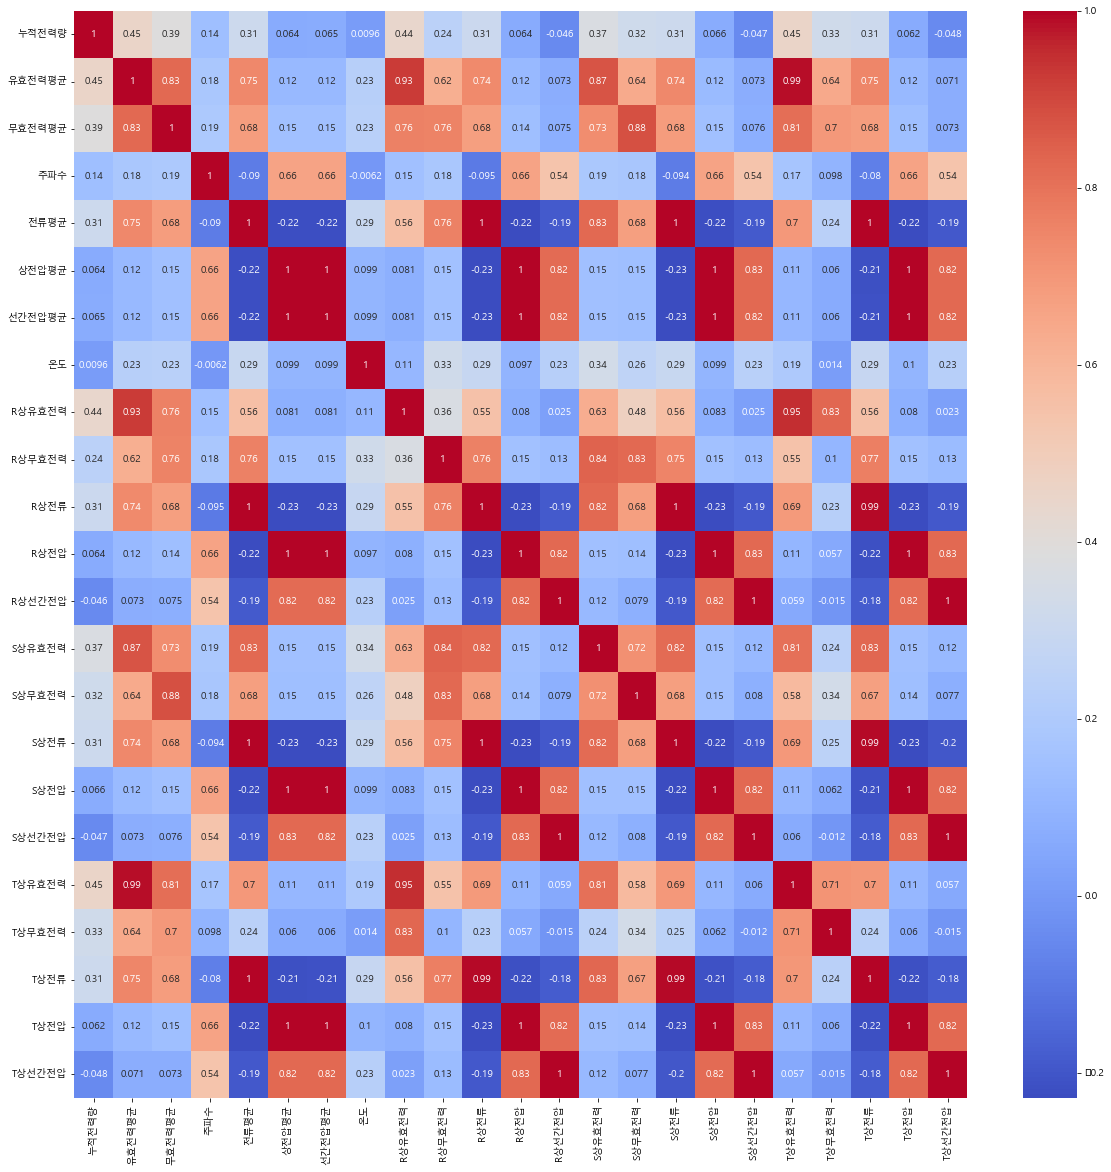

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(train_scale_X.corr(), annot=True,cmap='coolwarm')

- 도메인 지식 찾아보기 -> 이상치 찾아보기 및 수정 -> 0는 이상치가 아님 이상치라기엔 1/40이 음수 -> minmaxscale만 진행  
- target col 숫자로 교체
- 표준화 방법 찾아서 정리
- 상관관계 확인하기
-
- 분류 관련 분석법 찾기(Classification)
- 분석 돌리기